## Auto-sklearn Demonstration (Classification)
Breast Cancer
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
from pprint import pprint

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

import pandas as pd

# To install autosklearn: pip install pyrfr==0.6.1, then pip install auto-sklearn
import autosklearn.classification
from autosklearn.metrics import (accuracy, f1, roc_auc, precision,
                                average_precision, recall, log_loss)

from multi_train import MultiTrain
import matplotlib.pyplot as plt
# import autosklearn

### Data Loading

In [2]:
multi = MultiTrain()

In [3]:
multi.X_train = pd.read_csv('./data/BreastCancer/X_train.csv', index_col=[0])
multi.y_train = pd.read_csv('./data/BreastCancer/y_train.csv', index_col=[0])
multi.X_test = pd.read_csv('./data/BreastCancer/X_test.csv', index_col=[0])
multi.y_test = pd.read_csv('./data/BreastCancer/y_test.csv', index_col=[0])

In [4]:
print("X_train:", multi.X_train.shape, "y_train:", multi.y_train.shape)
print("X_test:", multi.X_test.shape, "y_test:", multi.y_test.shape)
multi.X_train.head()

X_train: (381, 30) y_train: (381, 1)
X_test: (188, 30) y_test: (188, 1)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
87164,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
905190,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
857637,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
914580,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
892604,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


### Build and fit a classifier
* **“n_jobs”** - number of cores in the system. (use -1 for as many cores as available).
* **“time_left_for_this_task”** argument for the number of seconds for the process to run.
<br>&emsp;&emsp;("less than 5-10 minutes is probably plenty for many small predictive modeling tasks (sub 1,000 rows).")
* **“per_run_time_limit”** - limit the time allocated to each model evaluation (in seconds).
* **"ensemble_size"** - number of models to include in the ensemble.
* **"metric"** - the metric which we want to optimize

In [5]:
%%time
initial_configurations_via_metalearning = [0, 2, 4, 8, 16, 32]
resampling_strategies = ['holdout', 'holdout-iterative-fit', 'cv', 'cv-iterative-fit']
max_models_on_disc = [2, 4, 8, 16, 32, 64]
ensemble_sizes = [1, 2, 3, 4, 8, 16]

# initial_configurations_via_metalearning = []
# resampling_strategies = ['cv', 'cv-iterative-fit', 'cv-iterative-fit']
# max_models_on_disc = []
# ensemble_sizes = []

multi.build_and_fit_classifier(dataset_name="BreastCancer",
                               initial_configurations_via_metalearning=initial_configurations_via_metalearning,
                               resampling_strategies=resampling_strategies,
                               max_models_on_disc=max_models_on_disc,
                               ensemble_sizes=ensemble_sizes)

-> Fitting - Initial Configurations: 0
Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_initial-confs_0.pkl'
-> Fitting - Initial Configurations: 2


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_initial-confs_2.pkl'
-> Fitting - Initial Configurations: 4


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_initial-confs_4.pkl'
-> Fitting - Initial Configurations: 8


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_initial-confs_8.pkl'
-> Fitting - Initial Configurations: 16


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_initial-confs_16.pkl'
-> Fitting - Initial Configurations: 32


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_initial-confs_32.pkl'
-> Fitting - Max Models on Disc: 2


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_max-models_2.pkl'
-> Fitting - Max Models on Disc: 4


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_max-models_4.pkl'
-> Fitting - Max Models on Disc: 8


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_max-models_8.pkl'
-> Fitting - Max Models on Disc: 16


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33011 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_max-models_16.pkl'
-> Fitting - Max Models on Disc: 32


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_max-models_32.pkl'
-> Fitting - Max Models on Disc: 64


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43483 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_max-models_64.pkl'
-> Fitting - Ensemble Sizes: 1


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45757 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_ensemble-size_1.pkl'
-> Fitting - Ensemble Sizes: 2


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43665 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_ensemble-size_2.pkl'
-> Fitting - Ensemble Sizes: 3


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_ensemble-size_3.pkl'
-> Fitting - Ensemble Sizes: 4


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_ensemble-size_4.pkl'
-> Fitting - Ensemble Sizes: 8


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_ensemble-size_8.pkl'
-> Fitting - Ensemble Sizes: 16


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_ensemble-size_16.pkl'
-> Fitting - Resampling Strategy: holdout


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43349 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_resamp-strategy_holdout.pkl'
-> Fitting - Resampling Strategy: holdout-iterative-fit


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45647 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_resamp-strategy_holdout-iterative-fit.pkl'
-> Fitting - Resampling Strategy: cv


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36805 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_resamp-strategy_cv.pkl'
-> Fitting - Resampling Strategy: cv-iterative-fit


/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/BreastCancer/autosklearn/autosklearn_BreastCancer_resamp-strategy_cv-iterative-fit.pkl'
CPU times: user 5h 2s, sys: 8min 3s, total: 5h 8min 5s
Wall time: 3h 46min 5s


## Testing effects of different parameter changes 

## Visualize 

In [6]:
collected_data = pd.read_csv('./models/BreastCancer/autosklearn/logs/log.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Train_Score,Test_Score
0,Initial_Confs,0,238.154013,0.992126,0.957447
1,Initial_Confs,2,198.054359,0.992126,0.978723
2,Initial_Confs,4,201.945836,0.992126,0.994681
3,Initial_Confs,8,225.328915,0.997375,0.973404
4,Initial_Confs,16,259.688155,1.000000,0.962766
5,Initial_Confs,32,181.392272,0.997375,0.973404
6,Max_Models,2,172.628465,0.989501,0.973404
7,Max_Models,4,173.350610,0.994751,0.978723
8,Max_Models,8,173.051530,1.000000,0.973404
9,Max_Models,16,177.737179,0.997375,0.973404


In [7]:
initial_confs_df = collected_data[collected_data['Feature'] == 'Initial_Confs']
max_models_df = collected_data[collected_data['Feature'] == 'Max_Models']
ensemble_size_df = collected_data[collected_data['Feature'] == 'Ensemble_Size']
resamp_strategy_df = collected_data[collected_data['Feature'] == 'Resampling_Strategy']

### Initial Configurations Effects

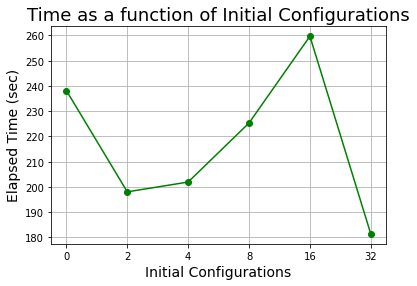

In [8]:
plt.plot(initial_confs_df['Value'], initial_confs_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Initial Configurations', fontsize=18)
plt.xlabel('Initial Configurations', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

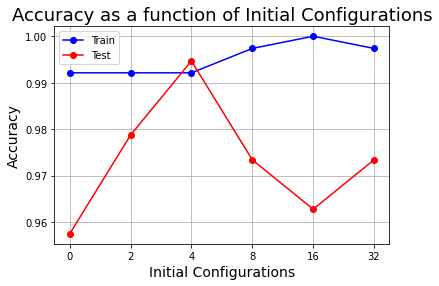

In [9]:
plt.plot(initial_confs_df['Value'], initial_confs_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(initial_confs_df['Value'], initial_confs_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Initial Configurations', fontsize=18)
plt.xlabel('Initial Configurations', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Max Models Effects

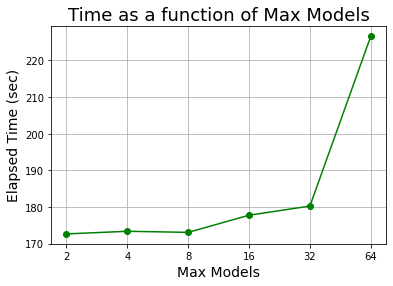

In [10]:
plt.plot(max_models_df['Value'], max_models_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Max Models', fontsize=18)
plt.xlabel('Max Models', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

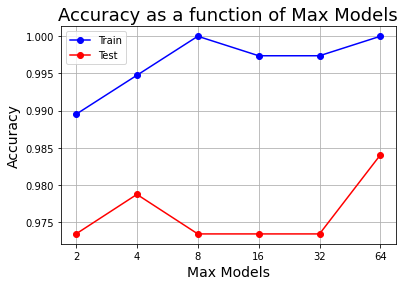

In [11]:
plt.plot(max_models_df['Value'], max_models_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(max_models_df['Value'], max_models_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Max Models', fontsize=18)
plt.xlabel('Max Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Ensemble Size Effects

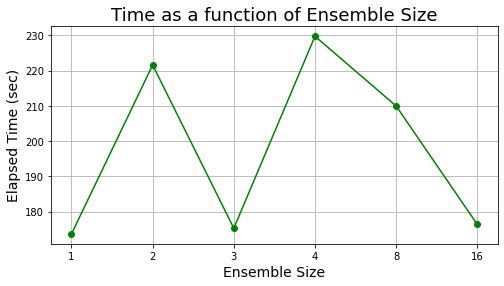

In [12]:
plt.figure(figsize=(8,4))

plt.plot(ensemble_size_df['Value'], ensemble_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Ensemble Size', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

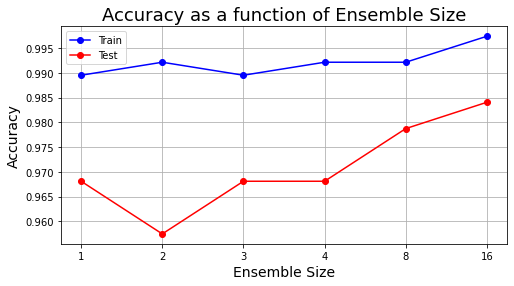

In [13]:
plt.figure(figsize=(8,4))
plt.plot(ensemble_size_df['Value'], ensemble_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(ensemble_size_df['Value'], ensemble_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Ensemble Size', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Remsampling Strategy Effects

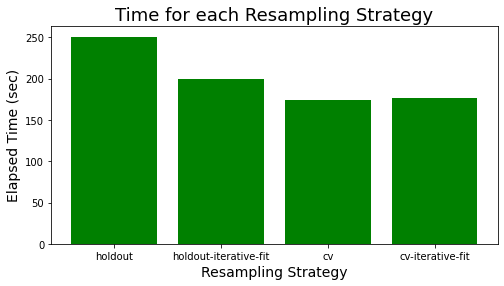

In [18]:
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(resamp_strategy_df['Value'], resamp_strategy_df['Elapsed_Time'], color ='green')
 
plt.xlabel("Resampling Strategy", fontsize=14)
plt.ylabel("Elapsed Time (sec)", fontsize=14)
plt.title("Time for each Resampling Strategy", fontsize=18)
plt.show()

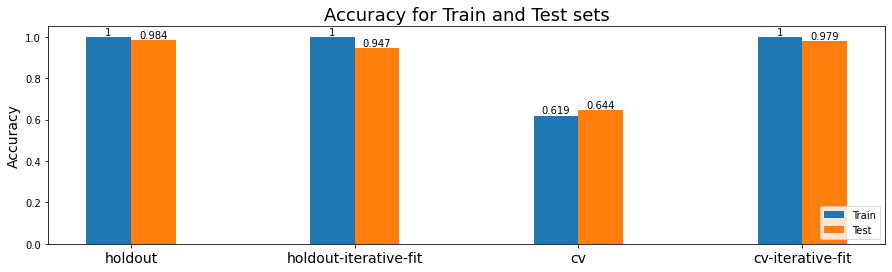

In [19]:
import numpy as np

labels = resamp_strategy_df['Value']
train_score = np.array(resamp_strategy_df['Train_Score']).round(3)
test_score = np.array(resamp_strategy_df['Test_Score']).round(3)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width/2, train_score, width, label='Train')
rects2 = ax.bar(x + width/2, test_score, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracy for Train and Test sets', fontsize=18)
ax.set_xticks(x, labels, fontsize=14)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=0)
ax.bar_label(rects2, padding=0)

plt.show()